In [159]:
import pandas as pd
import numpy as np

In [160]:
df = pd.read_csv('/content/Date Rank Apps.csv')

In [161]:
df.tail()

,app,keyword,date,rank
30275,com.praveen.reetexamapp,teaching methods for reet,2021-04-12,43.0
30276,com.sqsapps.teaching_practice,teaching methods for reet,2021-04-12,42.0
30277,com.praveen.reet2017examapp,teaching methods for reet,2021-04-12,35.0
30278,com.gktalk.reet_exam_app,teaching methods for reet,2021-04-12,30.0
30279,appinventor.ai_takshilaonline.RTETPracticeQues...,teaching methods for,NaN,NaN


In [162]:
df.shape

(30280, 4)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30280 entries, 0 to 30279
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   app      30280 non-null  object 
 1   keyword  30280 non-null  object 
 2   date     30279 non-null  object 
 3   rank     30279 non-null  float64
dtypes: float64(1), object(3)
memory usage: 946.4+ KB


In [164]:
df.fillna(0)

,app,keyword,date,rank
0,es.intercas.primertoqueappnew,f11,2021-04-28,198.0
1,com.appybuilder.themestarlauncher.realme3rprel...,f11,2021-04-28,196.0
2,com.dreeeeaaaamprrroo.beeeessttapp,f11,2021-04-28,190.0
3,com.dreamtipszzzz.app,f11,2021-04-28,188.0
4,dreamlapro.android.app,f11,2021-04-28,183.0
...,...,...,...,...
30275,com.praveen.reetexamapp,teaching methods for reet,2021-04-12,43.0
30276,com.sqsapps.teaching_practice,teaching methods for reet,2021-04-12,42.0
30277,com.praveen.reet2017examapp,teaching methods for reet,2021-04-12,35.0
30278,com.gktalk.reet_exam_app,teaching methods for reet,2021-04-12,30.0


In [165]:
df.describe()

,rank
count,30279.000000
mean,100.716206
std,57.941767
min,1.000000
25%,51.000000
50%,101.000000
75%,151.000000
max,200.000000


In [166]:
df2 = df.quantile([.75], axis = 0)
df2

,rank
0.75,151.0


In [167]:
df1 = df[['keyword']].value_counts()
df1.head()

keyword               
teaching quran offline    76
hair fall                 69
pimple remover            68
skin care products        68
social indian app         66
dtype: int64

In [168]:
df1 = df[['rank']].value_counts()
df1.head()

rank 
176.0    184
65.0     181
195.0    181
122.0    178
50.0     175
dtype: int64

In [169]:
df.loc[df['rank'].isin(['176.0'])]


,app,keyword,date,rank
42,com.appon.worldofcricket,espncricinfo,2021-04-28,176.0
263,tv.caffeine.app,dd sports,2021-04-28,176.0
350,com.bankbazaar.app,crikeybuzz,2021-04-28,176.0
409,org.hpcricket.app,criket,2021-04-28,176.0
496,app.cricketlive,cricket.com,2021-04-28,176.0
...,...,...,...,...
29485,com.cozanostra.perfect_real_piano_musical_keyb...,teaching keyboard,2021-04-12,176.0
29557,com.orenda.taimo.myapplication,teaching in school,2021-04-12,176.0
29717,com.applogix.online.classroom,teaching board for youtube,2021-04-12,176.0
30099,com.sampangfreeapps.sampangapps.maryam.masud.m...,teaching quran amma teaching,2021-04-12,176.0


## As you can observe here that multiple keywords are ranking same and also in similar dates.

**Now , I would like to check if there are keywords which matched inside the domain or not.**


In [170]:
import spacy
import matplotlib.pyplot as plt

import en_core_web_sm
nlp = en_core_web_sm.load() 

In [ ]:
!pip install texthero

In [172]:
import texthero as hero

In [173]:
news_content = df[["app"]]
news_content.head()

,app
0,es.intercas.primertoqueappnew
1,com.appybuilder.themestarlauncher.realme3rprel...
2,com.dreeeeaaaamprrroo.beeeessttapp
3,com.dreamtipszzzz.app
4,dreamlapro.android.app


In [174]:
news_content['clean_content'] = hero.clean(news_content['app'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [175]:
news_content.head(10)

,app,clean_content
0,es.intercas.primertoqueappnew,es intercas primertoqueappnew
1,com.appybuilder.themestarlauncher.realme3rprel...,com appybuilder themestarlauncher realme3rprel...
2,com.dreeeeaaaamprrroo.beeeessttapp,com dreeeeaaaamprrroo beeeessttapp
3,com.dreamtipszzzz.app,com dreamtipszzzz app
4,dreamlapro.android.app,dreamlapro android app
5,com.apptocker.huawei.y9.y9.themes.and.launcher...,com apptocker huawei y9 y9 themes launcher wal...
6,com.appybuilder.themestarlauncher.vivos1,com appybuilder themestarlauncher vivos1
7,com.graphicsecurity.android.brandmarkapp,com graphicsecurity android brandmarkapp
8,app.mydream.prediction,app mydream prediction
9,com.aomatatech.datatransferapp.filesharing,com aomatatech datatransferapp filesharing


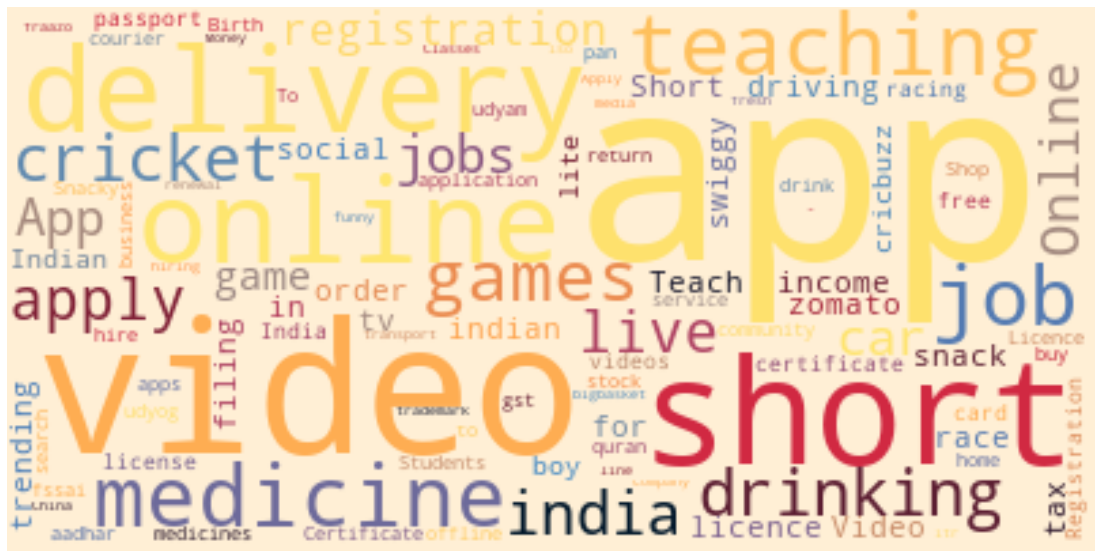

In [176]:
hero.wordcloud(df['keyword'], max_words=100,)

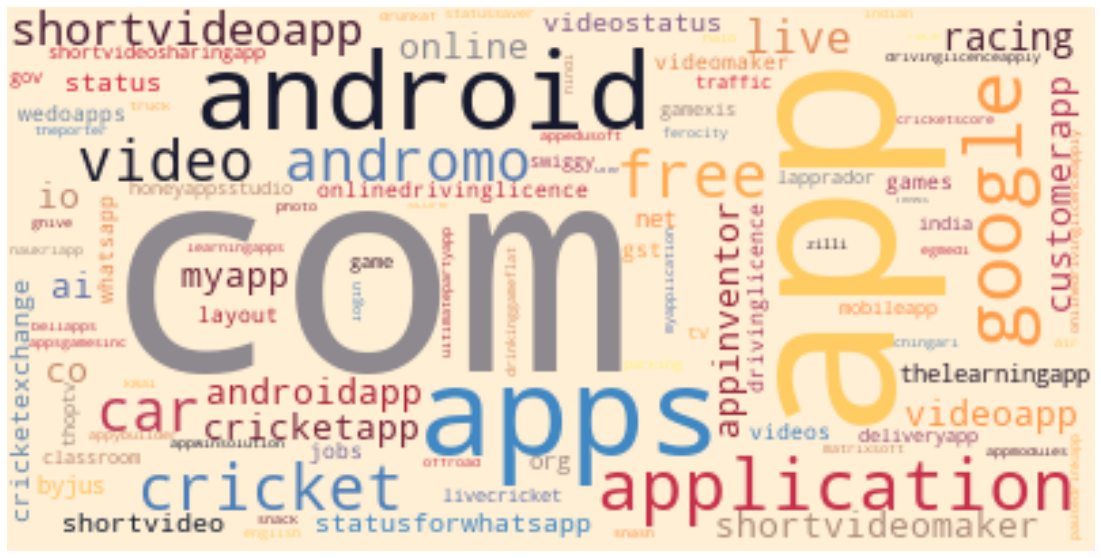

In [177]:
hero.wordcloud(news_content['clean_content'], max_words=100,)

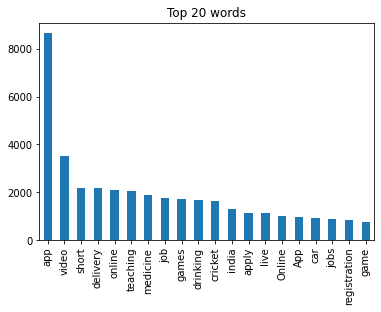

In [178]:
NUM_TOP_WORDS = 20

top_20 = hero.visualization.top_words(df['keyword']).head(NUM_TOP_WORDS)

# Draw the bar chart

top_20.plot.bar(rot=90, title="Top 20 words");

plt.show(block=True);

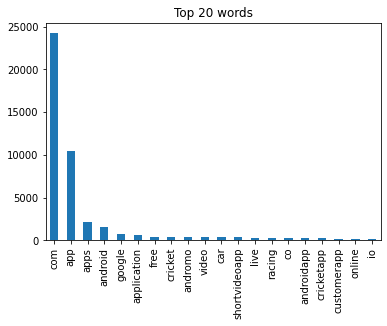

In [179]:
NUM_TOP_WORDS = 20

top_20 = hero.visualization.top_words(news_content['clean_content']).head(NUM_TOP_WORDS)

# Draw the bar chart

top_20.plot.bar(rot=90, title="Top 20 words");

plt.show(block=True);

**As you can see here that, apart from app which is common in use video, short,delivery,..and so has the highest number of demands for the app search.text**

### Let's look for similarity between app and keyword

In [180]:
df1 = df['keyword'].astype(str)

df2 = df['app'].astype(str)


In [181]:
from pyjarowinkler.distance import get_jaro_distance
df['res'] = [get_jaro_distance(x, y) for x, y in zip(df1,df2)]

In [182]:
df.tail(10)

,app,keyword,date,rank,res
30270,com.skyeducare.app,teaching methods for reet,2021-04-12,65.0,0.41
30271,com.yctbook.reetprimaryleveli_vteachersppbapp,teaching methods for reet,2021-04-12,61.0,0.50
30272,com.appybuilder.yogendra9893751060.CHILD_DEVEL...,teaching methods for reet,2021-04-12,54.0,0.43
30273,com.andromo.dev601172.app863087,teaching methods for reet,2021-04-12,46.0,0.40
30274,com.appybuilder.yogendra9893751060.RTET,teaching methods for reet,2021-04-12,44.0,0.49
30275,com.praveen.reetexamapp,teaching methods for reet,2021-04-12,43.0,0.46
30276,com.sqsapps.teaching_practice,teaching methods for reet,2021-04-12,42.0,0.54
30277,com.praveen.reet2017examapp,teaching methods for reet,2021-04-12,35.0,0.49
30278,com.gktalk.reet_exam_app,teaching methods for reet,2021-04-12,30.0,0.48
30279,appinventor.ai_takshilaonline.RTETPracticeQues...,teaching methods for,NaN,NaN,0.43


In [183]:
df[df['res'] < 0.50]['keyword'].count()

17581

In [184]:
df[df['res'] > 0.50]['keyword'].count()

11449

In [192]:
df[df['res'] > 0.80]['keyword'].count()

51

In [193]:
df[df['res'] > 0.90]['keyword'].count()

2

**'res' column is the similarity value and the count tells us there is less chances of having "less than 50% similarity between the them"**

In [185]:
df[df['res'] > 0.60]['keyword'].count()

2371

In [186]:
df[df['res'] < 0.40]['keyword'].count()

4902

In [187]:
a1 = df[df['res'] > 0.80]['keyword'][df['rank'] < 50.0]
a1.count()

34

In [188]:
a2 = df[df['res'] > 0.80]['keyword'][df['rank'] < 10.0]
a2.count()

20

In [189]:
a3 = df[df['res'] > 0.80]['keyword'][df['rank'] < 20.0]
a3.count()

28

In [198]:
a4 = df[df['res'] > 0.80]['keyword'][df['rank'] < 50.0]
a4.count()

34

In [199]:
a5 = df[df['res'] > 0.90]['keyword'][df['rank'] < 10.0]
a5.count()

2

**I think this struct me that how people are trying to use some keywords relevant to their app in the package name for ranking and it does help them to grow since more and more people are nowadays leaving the part for like putting in description and title.This data shows itself.**

In [190]:
df1 = df['keyword'].astype(str).all()
#df1.str.lower

df2 = df['app'].astype(str).all()
#df2.str.lower

In [191]:
import Levenshtein as lev

Ratio = lev.ratio(str(df1),str(df2))
print(Ratio)

0.24324324324324326
